In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder , StandardScaler , MinMaxScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN 
import pylab
from sklearn.metrics import silhouette_score

In [70]:
df = pd.read_csv("")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [71]:
le = LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [72]:
print ("Shape of dataset before cleaning: ", df.shape)
df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)' ]] = df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)' ]].apply(pd.to_numeric, errors='coerce')
df = df.dropna()
df = df.reset_index(drop=True)
print ("Shape of dataset after cleaning: ", df.shape)
df.head()

Shape of dataset before cleaning:  (200, 5)
Shape of dataset after cleaning:  (200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# K_Means

In [74]:
X = df.values[:,1:]
X = np.nan_to_num(X)
scaled = StandardScaler().fit_transform(X)
scaled

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

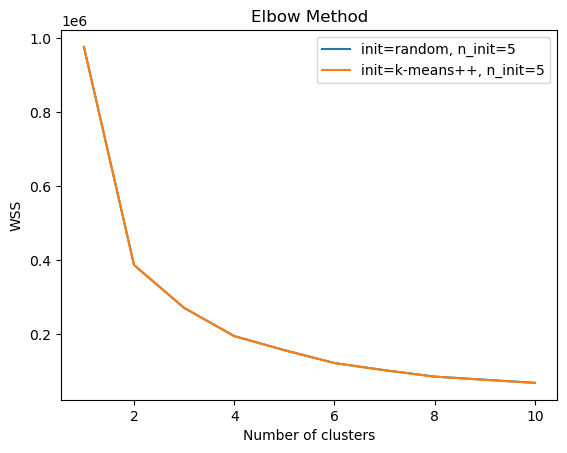

In [75]:
# Create empty lists to store the WSS values for different parameters
wss_values_kmeans = []
wss_values_kmeanspp = []

# Try k from 1 to 10 and compute the WSS for each value of k with different parameters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=4, init="random", n_init=12)
    kmeanspp = KMeans(n_clusters=k, random_state=4, init="k-means++", n_init=12)
    kmeans.fit(df)
    kmeanspp.fit(df)
    wss_values_kmeans.append(kmeans.inertia_)
    wss_values_kmeanspp.append(kmeanspp.inertia_)

# Plot the WSS values against k for different parameters
plt.plot(range(1, 11), wss_values_kmeans, label="init=random, n_init=5")
plt.plot(range(1, 11), wss_values_kmeanspp, label="init=k-means++, n_init=5")
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WSS")
plt.legend()
plt.show()


In [76]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 5)
k_means.fit(scaled)
labels = k_means.labels_
print(labels)

[0 0 0 0 0 0 3 0 1 0 1 0 3 0 1 0 0 0 1 0 1 0 3 0 3 0 3 0 3 0 1 0 1 0 3 0 3
 0 3 0 3 0 1 0 3 0 3 0 0 0 3 0 0 1 3 1 3 1 0 1 1 0 3 3 1 0 3 3 0 0 1 3 3 3
 1 0 3 1 0 3 1 1 1 3 0 1 3 0 0 3 3 0 1 3 3 0 3 0 1 0 0 3 1 0 1 0 3 1 1 1 1
 0 3 0 0 0 3 3 3 3 0 3 3 2 3 2 1 2 1 2 1 2 3 2 1 2 3 2 1 2 3 2 3 2 1 2 1 2
 3 2 1 2 3 2 3 2 1 2 1 2 3 2 1 2 1 2 1 2 3 2 1 2 1 2 3 2 1 2 1 2 3 2 1 2 3
 2 3 2 3 2 3 2 1 2 3 2 3 2 1 2]


In [77]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-0.10296627, -1.00061372, -0.79748661,  0.42718095],
       [ 1.12815215,  0.74307816,  0.06431159, -0.79449512],
       [ 0.04339047, -0.44191719,  0.99158305,  1.23950275],
       [-0.88640526,  0.60098416,  0.0214012 , -0.55996755]])

In [78]:
df["Cust_clust"] = labels
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cust_clust
0,1,1,19,15,39,0
1,2,1,21,15,81,0
2,3,0,20,16,6,0
3,4,0,23,16,77,0
4,5,0,31,17,40,0


In [79]:
df.groupby('Cust_clust').mean()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cust_clust,,,,,
0,52.740741,0.388889,24.907407,39.666667,61.203704
1,104.489796,1.000000,49.204082,62.244898,29.734694
2,162.000000,0.461538,32.692308,86.538462,82.128205
3,100.241379,0.000000,47.224138,61.120690,35.775862


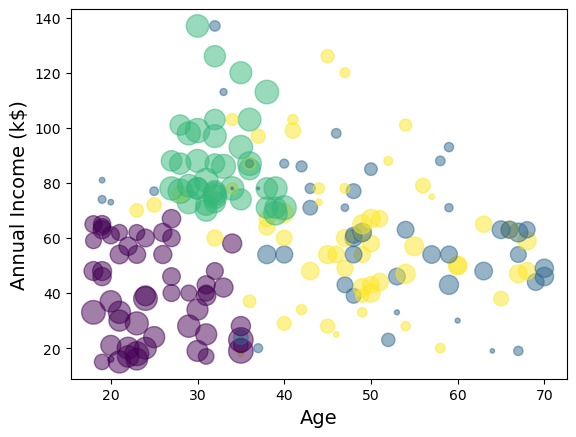

In [80]:
area = np.pi * ( X[:, 3])+ 0.5
plt.scatter(X[:, 1], X[:, 2], s=area, c=labels.astype(np.float64), alpha=0.5)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Annual Income (k$)', fontsize=14)

plt.show()


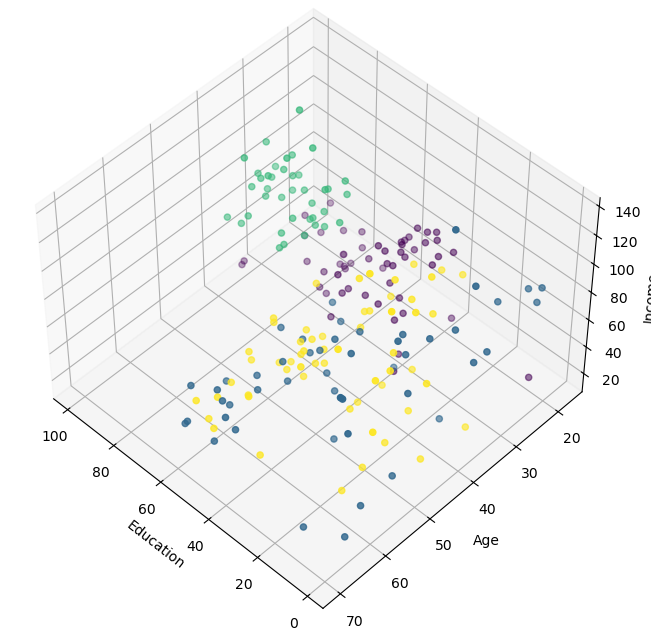

In [81]:
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134 ) 
fig.add_axes(ax)
plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 3], X[:, 1], X[:, 2], c= labels.astype(np.float64))

# Hierarchical

In [83]:
featureset = df[['Gender', 'Age', 'Annual Income (k$)','Spending Score (1-100)']]

In [84]:
# Define the clustering model
agglom = AgglomerativeClustering(n_clusters=5, linkage='ward')
# Fit the model to the relevant features in the dataset
agglom.fit(df[['Annual Income (k$)', 'Spending Score (1-100)']])
df['cluster_'] = agglom.labels_
df= df.rename(columns={"Annual Income (k$)": "Annual",'Spending Score (1-100)':'Score' })
df.head()

,CustomerID,Gender,Age,Annual,Score,Cust_clust,cluster_
0,1,1,19,15,39,0,4
1,2,1,21,15,81,0,3
2,3,0,20,16,6,0,4
3,4,0,23,16,77,0,3
4,5,0,31,17,40,0,4


In [85]:
# Define the range of number of clusters to explore
n_clusters_range = range(2, 11)

# Define the range of linkage methods to explore
linkage_range = ['ward', 'complete', 'average', 'single']

best_score = -1
best_params = {}
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx

for n_clusters in n_clusters_range:
    for linkage in linkage_range:
        
        # Perform hierarchical clustering
        model = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage=linkage)
        model.fit(feature_mtx)
        
        # Calculate the silhouette score
        score = silhouette_score(feature_mtx, model.labels_, metric='euclidean')
        
        # Update the best score and parameters if the current score is better
        if score > best_score:
            best_score = score
            best_params = {'n_clusters': n_clusters, 'linkage': linkage}

# Print the best parameters and silhouette score
print("Best parameters: ", best_params)
print("Best silhouette score: ", best_score)


Best parameters:  {'n_clusters': 2, 'linkage': 'ward'}
Best silhouette score:  0.5194624832665107


In [86]:
x = featureset.values #returns a numpy array
min_max_scaler = MinMaxScaler()
feature_mtx = min_max_scaler.fit_transform(x)
feature_mtx

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ],
       [1.        , 0.94230769, 0.03278689, 0.13265306],
       [0.        , 0.32692308, 0.03278689, 1.        ],
       [0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.        , 0.11538462, 0.04098361, 0.7755102 ],
       [1.        , 0.36538462, 0.04098361, 0.12244898],
       [1.        , 0.07692308, 0.04098361, 0.79591837],
       [0.        , 0.32692308, 0.04918033, 0.34693878],
       [1.        , 0.03846154,

In [87]:
dist_matrix = euclidean_distances(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.43029381 1.05538015 ... 1.00888686 1.0528145  1.11639204]
 [0.43029381 0.         1.25941672 ... 0.93683095 1.20748243 1.01507247]
 [1.05538015 1.25941672 0.         ... 1.53221213 1.43245312 1.62419301]
 ...
 [1.00888686 0.93683095 1.53221213 ... 0.         0.57849818 0.13432353]
 [1.0528145  1.20748243 1.43245312 ... 0.57849818 0.         0.66437953]
 [1.11639204 1.01507247 1.62419301 ... 0.13432353 0.66437953 0.        ]]


In [88]:
Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')

/var/folders/cy/v8prby6d1sn2xp04c_y3vhqm0000gn/T/ipykernel_59682/1633147189.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z_using_dist_matrix = hierarchy.linkage(dist_matrix, 'complete')


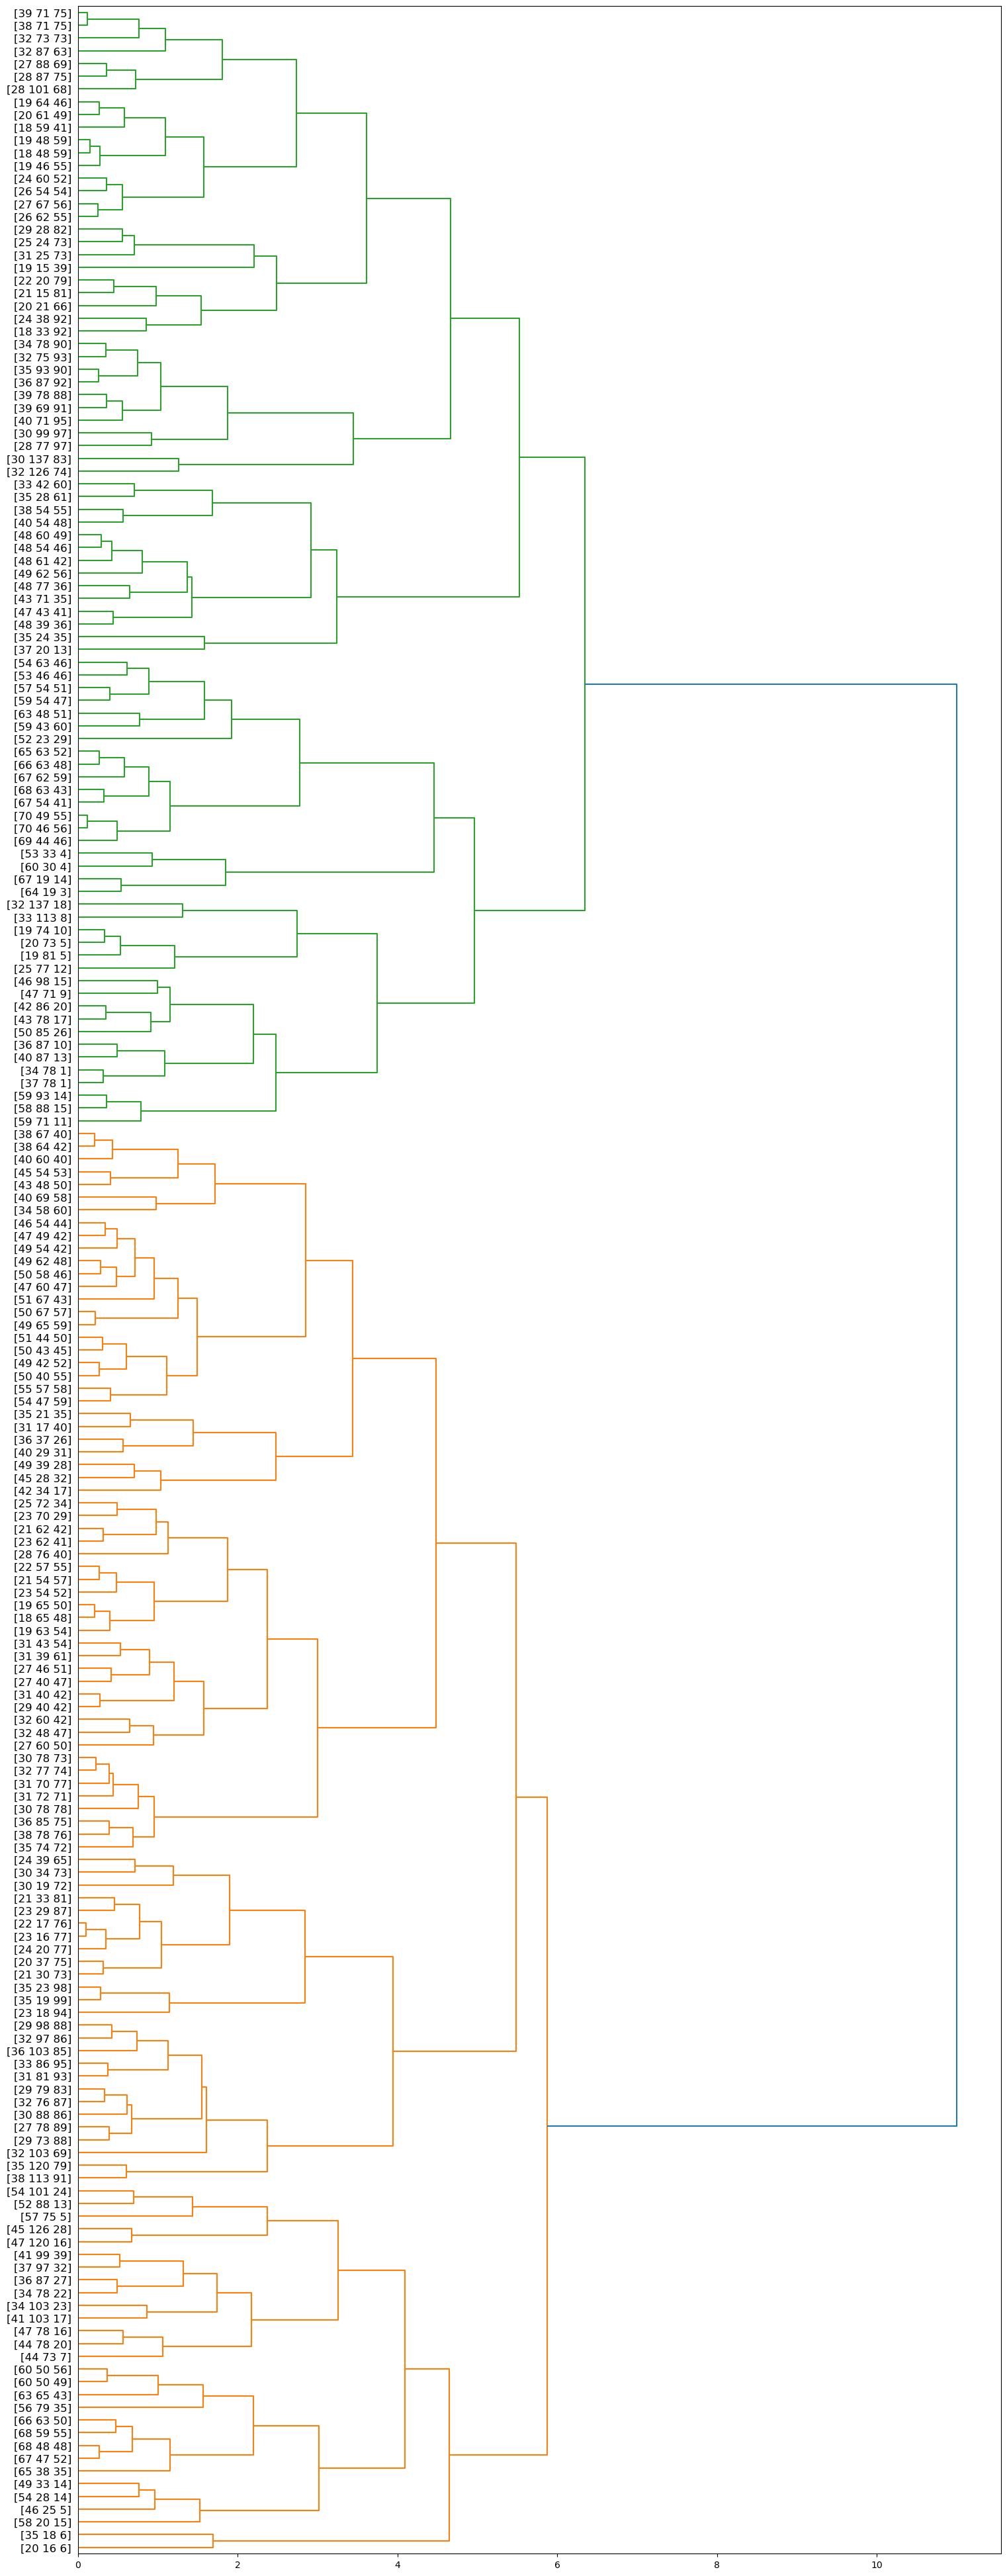

In [89]:
fig = pylab.figure(figsize=(18,50))
def llf(id):
    return '[%s %s %s]' % (df['Age'][id], df['Annual'][id], int(float(df['Score'][id])))
    
dendro = hierarchy.dendrogram(Z_using_dist_matrix,  leaf_label_func=llf, leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [90]:
agglom = AgglomerativeClustering(n_clusters=best_params['n_clusters'], linkage= best_params['linkage'])
agglom.fit(dist_matrix)

agglom.labels_

/Applications/anaconda3/lib/python3.12/site-packages/scipy/cluster/hierarchy.py:796: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

/var/folders/cy/v8prby6d1sn2xp04c_y3vhqm0000gn/T/ipykernel_59682/3342904495.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Age, subset.Annual, s= subset.Score*10, c=color, label='cluster'+str(label),alpha=0.5)
/var/folders/cy/v8prby6d1sn2xp04c_y3vhqm0000gn/T/ipykernel_59682/3342904495.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(subset.Age, subset.Annual, s= subset.Score*10, c=col

Text(0, 0.5, 'Annual')

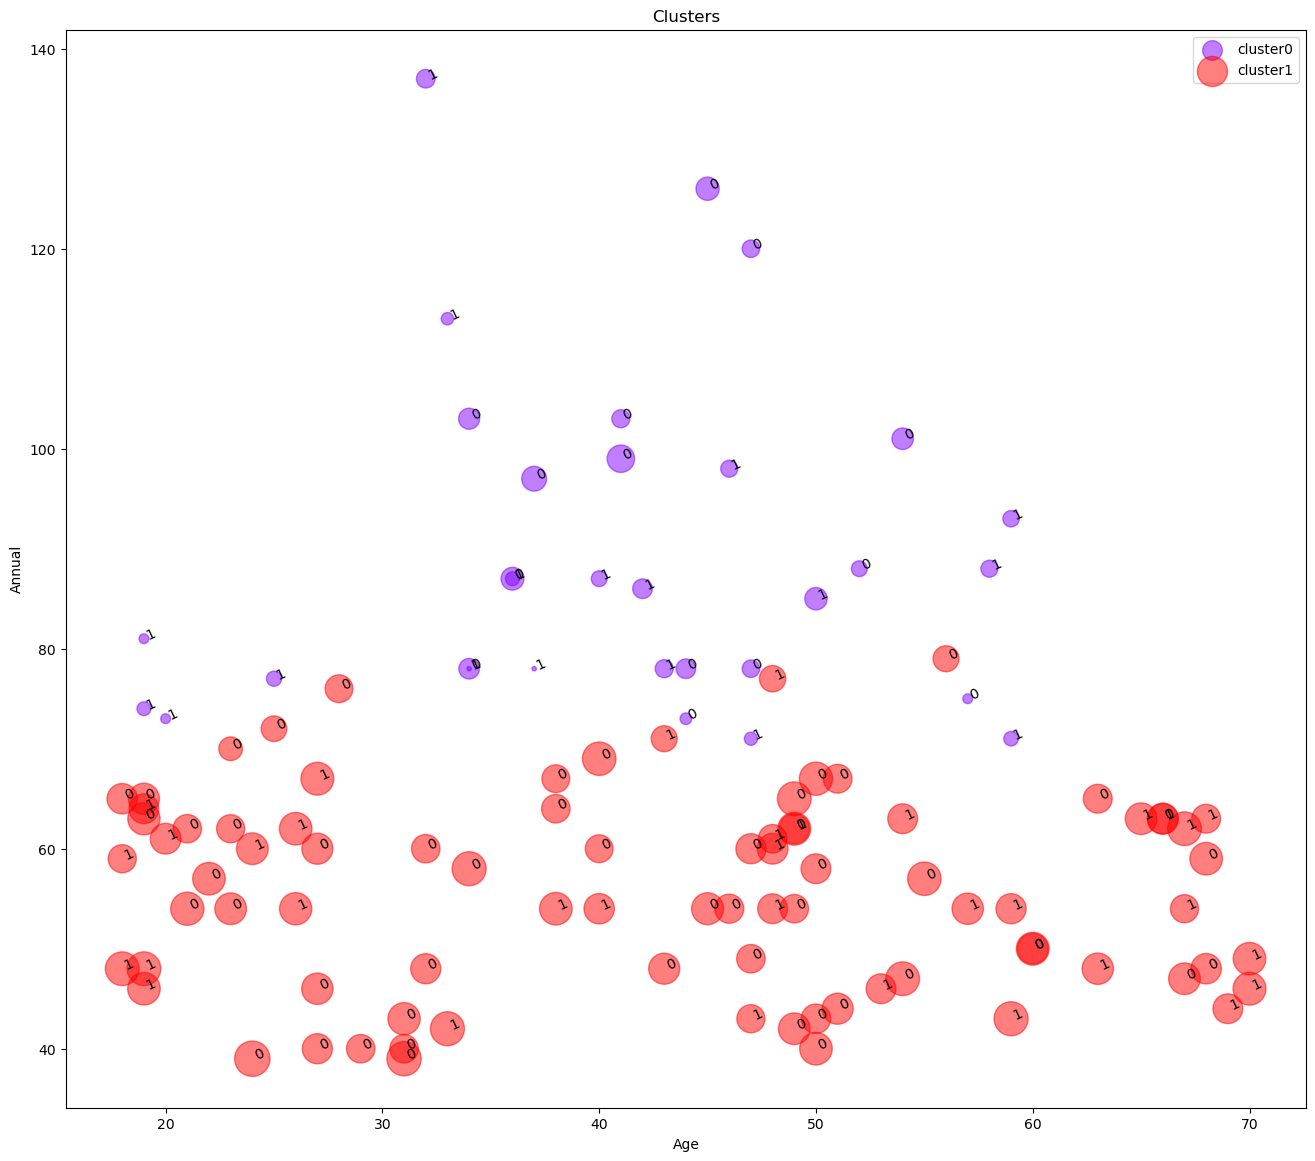

In [133]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.Age[i], subset.Annual[i],str(subset['Gender'][i]), rotation=25) 
    plt.scatter(subset.Age, subset.Annual, s= subset.Score*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Annual')

In [92]:
df.groupby(['cluster_','Gender'])['cluster_'].count()

cluster_  Gender
0         0         14
          1         18
1         0         51
          1         34
2         0         21
          1         18
3         0         12
          1          9
4         0         14
          1          9
Name: cluster_, dtype: int64

In [93]:
agg_cars = df.groupby(['cluster_','Gender'])['Score'].mean()
agg_cars

cluster_  Gender
0         0         20.642857
          1         11.666667
1         0         48.647059
          1         49.852941
2         0         81.666667
          1         82.666667
3         0         81.833333
          1         77.666667
4         0         21.714286
          1         19.666667
Name: Score, dtype: float64

# DBSCAN

In [95]:
# Standardize the data
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

In [96]:
# Find the best parameters using the silhouette score
best_score = -1
for eps in np.arange(0.1, 2.0, 0.1):
    for min_samples in range(2, 10):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        labels = model.fit_predict(df_std)
        unique_labels = np.unique(labels)
        if len(unique_labels) > 1:
            score = silhouette_score(df_std, labels)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}
print(best_params)

{'eps': 1.0, 'min_samples': 2}


In [97]:
# Fit the model with the best parameters
model = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
model.fit(df_std)

DBSCAN(eps=1.0, min_samples=2)

In [98]:
model.labels_

array([-1,  0, -1,  1,  2,  1,  3,  1,  4,  1,  4,  1,  3,  1,  5,  0,  2,
        0,  6,  1,  5,  0,  3,  0,  3,  0,  3,  0,  3,  1,  4,  1,  4,  0,
        3,  1,  3,  1,  3,  1, -1,  0,  6,  7,  3,  7,  8,  7,  7,  7,  8,
        9,  7, 10,  8, 10,  8, 10,  7, 10, 10,  9,  8,  8, 10,  9,  8,  8,
        9,  7, 10,  8,  8,  8, 10,  9,  8, 10,  7,  8, 10, 10, 10,  8,  7,
       10,  8,  7,  7,  8,  8,  9, 10,  8,  8,  9,  8,  7, 10,  9,  7,  8,
       10,  9, 10,  7,  8, 10, 10, 10, 10,  7,  8,  9,  7,  7,  8,  8,  8,
        8,  9,  8,  8, 11,  8, 12, 10, 11, 13, 11, 13, 11,  8, 12, 13, 12,
       14, 11, 13, 12, 14, 11,  8, 12, 13, 11, 10, 12, 14, 11, 13, 11, 14,
       12, 14, 12, 13, 12, 13, 12,  8, 12, 13, 12, 13, 12, 13, 12, 14, 11,
       13, 11, 13, 11, 14, 12, 13, 11, 13, 11, 14, 12, 13, 12, 14, 11, 14,
       11, 14, 12, 14, 12, -1, 12, 14, 12, 14, 15, -1, 15])

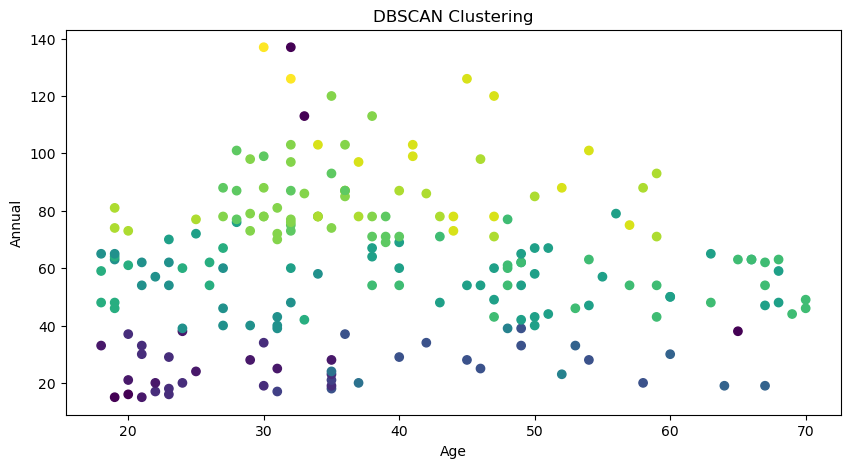

In [99]:
# Plot the resulting clusters
plt.figure(figsize=(10, 5))
plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c=model.labels_)
plt.xlabel('Age')
plt.ylabel('Annual')
plt.title('DBSCAN Clustering')
cluster_labels = list(range(0, n_clusters))
plt.show()